In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
#load csv files

In [3]:
ride = pd.read_csv('Resources/ride_data.csv')
ride.head()

,city,date,fare,ride_id
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038
1,South Roy,2016-01-02 18:42:34,17.49,4036272335942
2,Wiseborough,2016-01-21 17:35:29,44.18,3645042422587
3,Spencertown,2016-07-31 14:53:22,6.87,2242596575892
4,Nguyenbury,2016-07-09 04:42:44,6.28,1543057793673


In [4]:
city = pd.read_csv('Resources/city_data.csv')
city.head()

,city,driver_count,type
0,Kelseyland,63,Urban
1,Nguyenbury,8,Urban
2,East Douglas,12,Urban
3,West Dawnfurt,34,Urban
4,Rodriguezburgh,52,Urban


In [5]:
#merge two csv files

In [6]:
pyber_df = pd.merge(ride, city, how='outer', on='city', sort=True)
pyber_df.head()

,city,date,fare,ride_id,driver_count,type
0,Alvarezhaven,2016-04-18 20:51:29,31.93,4267015736324,21,Urban
1,Alvarezhaven,2016-08-01 00:39:48,6.42,8394540350728,21,Urban
2,Alvarezhaven,2016-09-01 22:57:12,18.09,1197329964911,21,Urban
3,Alvarezhaven,2016-08-18 07:12:06,20.74,357421158941,21,Urban
4,Alvarezhaven,2016-04-04 23:45:50,14.25,6431434271355,21,Urban


In [7]:
# * Average Fare ($) Per City
# * Total Number of Rides Per City
# * Total Number of Drivers Per City
# * City Type (Urban, Suburban, Rural)

In [8]:
#separate the df by city types
urban_df=pyber_df.loc[pyber_df['type'] == 'Urban']
suburban_df=pyber_df.loc[pyber_df['type'] == 'Suburban']
rural_df=pyber_df.loc[pyber_df['type'] == 'Rural']

In [9]:
#sum,count, and mean for each city type
urban_city_sum=urban_df.groupby('city').sum()
urban_city_ct=urban_df.groupby('city').count()
urban_city_avg=urban_df.groupby('city').mean()

In [10]:
#mean=avg fare, ct=total rides, sum/ct=driver counts
urban_x_axis=list(urban_city_ct['ride_id'])
urban_y_axis=list(urban_city_avg['fare'])
urban_s=list((urban_city_sum/urban_city_ct)['driver_count'])

In [11]:
sub_city_sum=suburban_df.groupby('city').sum()
sub_city_ct=suburban_df.groupby('city').count()
sub_city_avg=suburban_df.groupby('city').mean()
sub_x_axis=list(sub_city_ct['ride_id'])
sub_y_axis=list(sub_city_avg['fare'])
sub_s=list((sub_city_sum/sub_city_ct)['driver_count'])

In [12]:
rural_city_sum=rural_df.groupby('city').sum()
rural_city_ct=rural_df.groupby('city').count()
rural_city_avg=rural_df.groupby('city').mean()
rural_x_axis=list(rural_city_ct['ride_id'])
rural_y_axis=list(rural_city_avg['fare'])
rural_s=list((rural_city_sum/rural_city_ct)['driver_count'])

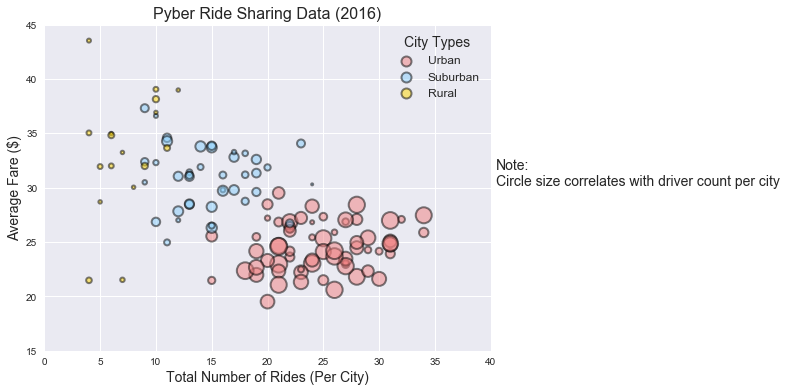

In [13]:
plt.figure(figsize=(8,6))
sns.set(color_codes=True)

#urban plot
plt.scatter(urban_x_axis, urban_y_axis, marker='o', facecolors='lightcoral', edgecolors='black', s=[x*4 for x in urban_s], alpha=0.5, label='Urban', linewidth=2.0)
#suburban plot
plt.scatter(sub_x_axis, sub_y_axis, marker='o', facecolors='lightskyblue', edgecolors='black', s=[x*4 for x in sub_s], alpha=0.5, label='Suburban', linewidth=2.0)
#rural plot
plt.scatter(rural_x_axis, rural_y_axis, marker='o', facecolors='gold', edgecolors='black', s=[x*4 for x in rural_s], alpha=0.5, label='Rural', linewidth=2.0)

#set xlim and ylim
plt.xlim(0, 40)
plt.ylim(15,45)

plt.title('Pyber Ride Sharing Data (2016)', fontsize=16)
plt.xlabel('Total Number of Rides (Per City)', fontsize=14)
plt.ylabel('Average Fare ($)', fontsize=14)


plt.annotate('Note:\nCircle size correlates with driver count per city',
            xy=(1, 0.5),  xytext=(5, 10), xycoords=('axes fraction', 'figure fraction'),
            textcoords='offset points', size=14)
lgnd = plt.legend(fontsize=12, markerscale=1, frameon=False, title='City Types')
plt.setp(lgnd.get_title(),fontsize=14)
lgnd.legendHandles[0]._sizes = [100]
lgnd.legendHandles[1]._sizes = [100]
lgnd.legendHandles[2]._sizes = [100]

plt.grid(True)
plt.show()

In [14]:
# In addition, you will be expected to produce the following three pie charts:

# % of Total Fares by City Type
# % of Total Rides by City Type
# % of Total Drivers by City Type

In [15]:
total_fare=pyber_df.sum()['fare']

In [16]:
urban_fare = urban_df.groupby('type').sum()['fare']
urban_fare_percent=urban_fare/total_fare
urban_fare_percent

type
Urban    0.619745
Name: fare, dtype: float64

In [17]:
suburban_fare = suburban_df.groupby('type').sum()['fare']
suburban_fare_percent=suburban_fare/total_fare
suburban_fare_percent

type
Suburban    0.314458
Name: fare, dtype: float64

In [18]:
rural_fare = rural_df.groupby('type').sum()['fare']
rural_fare_percent=rural_fare/total_fare
rural_fare_percent

type
Rural    0.065798
Name: fare, dtype: float64

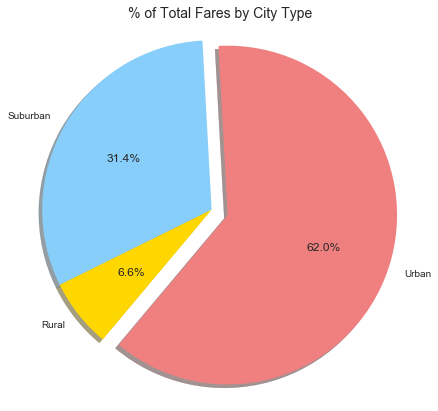

In [19]:
plt.figure(figsize=(7,7))
faresize=list(zip(urban_fare_percent, suburban_fare_percent, rural_fare_percent))
labels = ['Urban', 'Suburban', 'Rural']
colors = ['lightcoral', 'lightskyblue', 'gold']
explode = (0.1,0,0)

plt.pie(faresize[0], explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=230)
plt.title('% of Total Fares by City Type',fontsize=14)
plt.axis('equal')
plt.show()

In [20]:
total_rides=len(pyber_df)
urban_rides=urban_df.groupby('type').count()['ride_id']

In [21]:
suburban_rides=suburban_df.groupby('type').count()['ride_id']
suburban_rides

type
Suburban    657
Name: ride_id, dtype: int64

In [22]:
rural_rides=rural_df.groupby('type').count()['ride_id']
rural_rides

type
Rural    125
Name: ride_id, dtype: int64

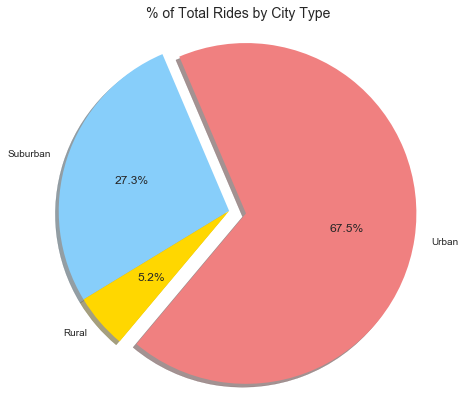

In [23]:
plt.figure(figsize=(7,7))
ridesize=list(zip(urban_rides, suburban_rides, rural_rides))
labels = ['Urban', 'Suburban', 'Rural']
colors = ['lightcoral', 'lightskyblue', 'gold']
explode = (0.1,0,0)

plt.pie(ridesize[0], explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=230)
plt.title('% of Total Rides by City Type',fontsize=14)
plt.axis('equal')
plt.show()

In [24]:
driver_df = pyber_df.drop_duplicates(['city'],keep='first')
driver_type=driver_df.groupby('type').sum()
driver_type

,fare,ride_id,driver_count
type,,,
Rural,575.86,80908776277624,104
Suburban,1184.07,170431128985342,635
Urban,1567.85,319081797791091,2607


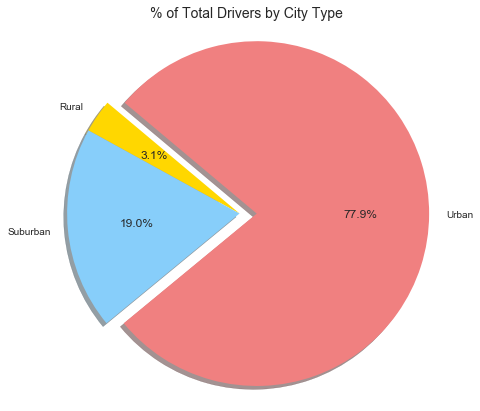

In [26]:
plt.figure(figsize=(7,7))
driversize=list(driver_type['driver_count'])
labels = ['Rural', 'Suburban', 'Urban']
colors = ['gold', 'lightskyblue', 'lightcoral']
explode = (0,0,0.1)

plt.pie(driversize, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title('% of Total Drivers by City Type',fontsize=14)
plt.axis('equal')
plt.show()